#Importing the required libraries


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score


In [30]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/drive/MyDrive/housing.csv', header=None, delimiter=r"\s+", names=column_names)
print("Count of Rows and Columns:", df.shape)

Count of Rows and Columns: (506, 14)


In [31]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [32]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [33]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [35]:
corr=df.corr()
corr['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

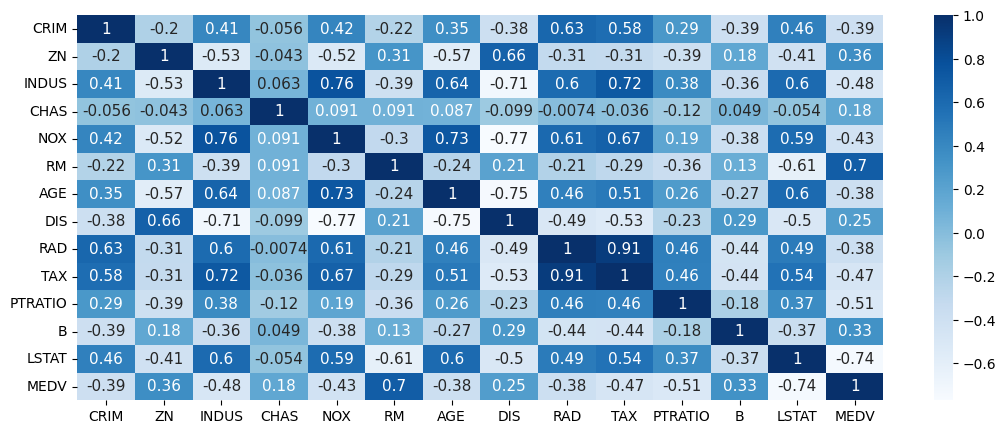

In [36]:
plt.figure(figsize=(13,5))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':11},cmap='Blues')
plt.show()

In [37]:
#columns names

df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

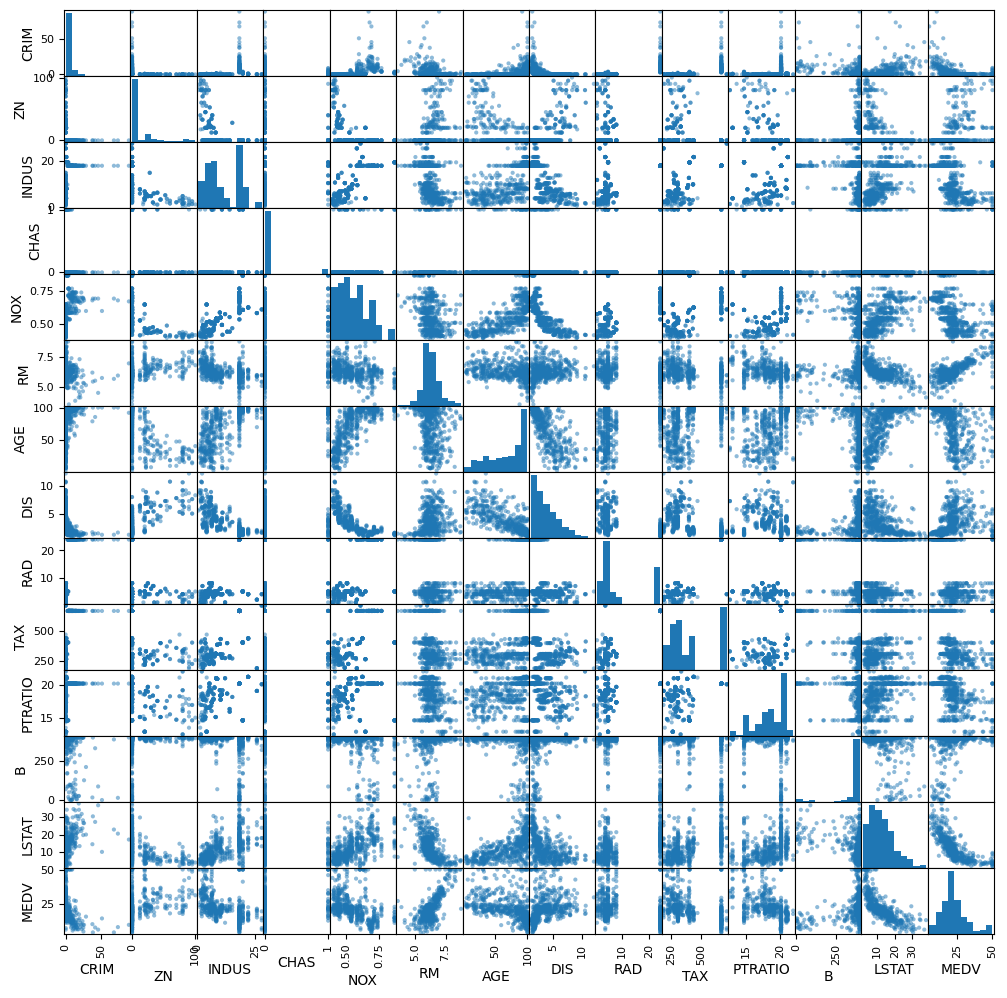

In [38]:

# Create a scatter plot matrix
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

#Each column scatter plot with medv

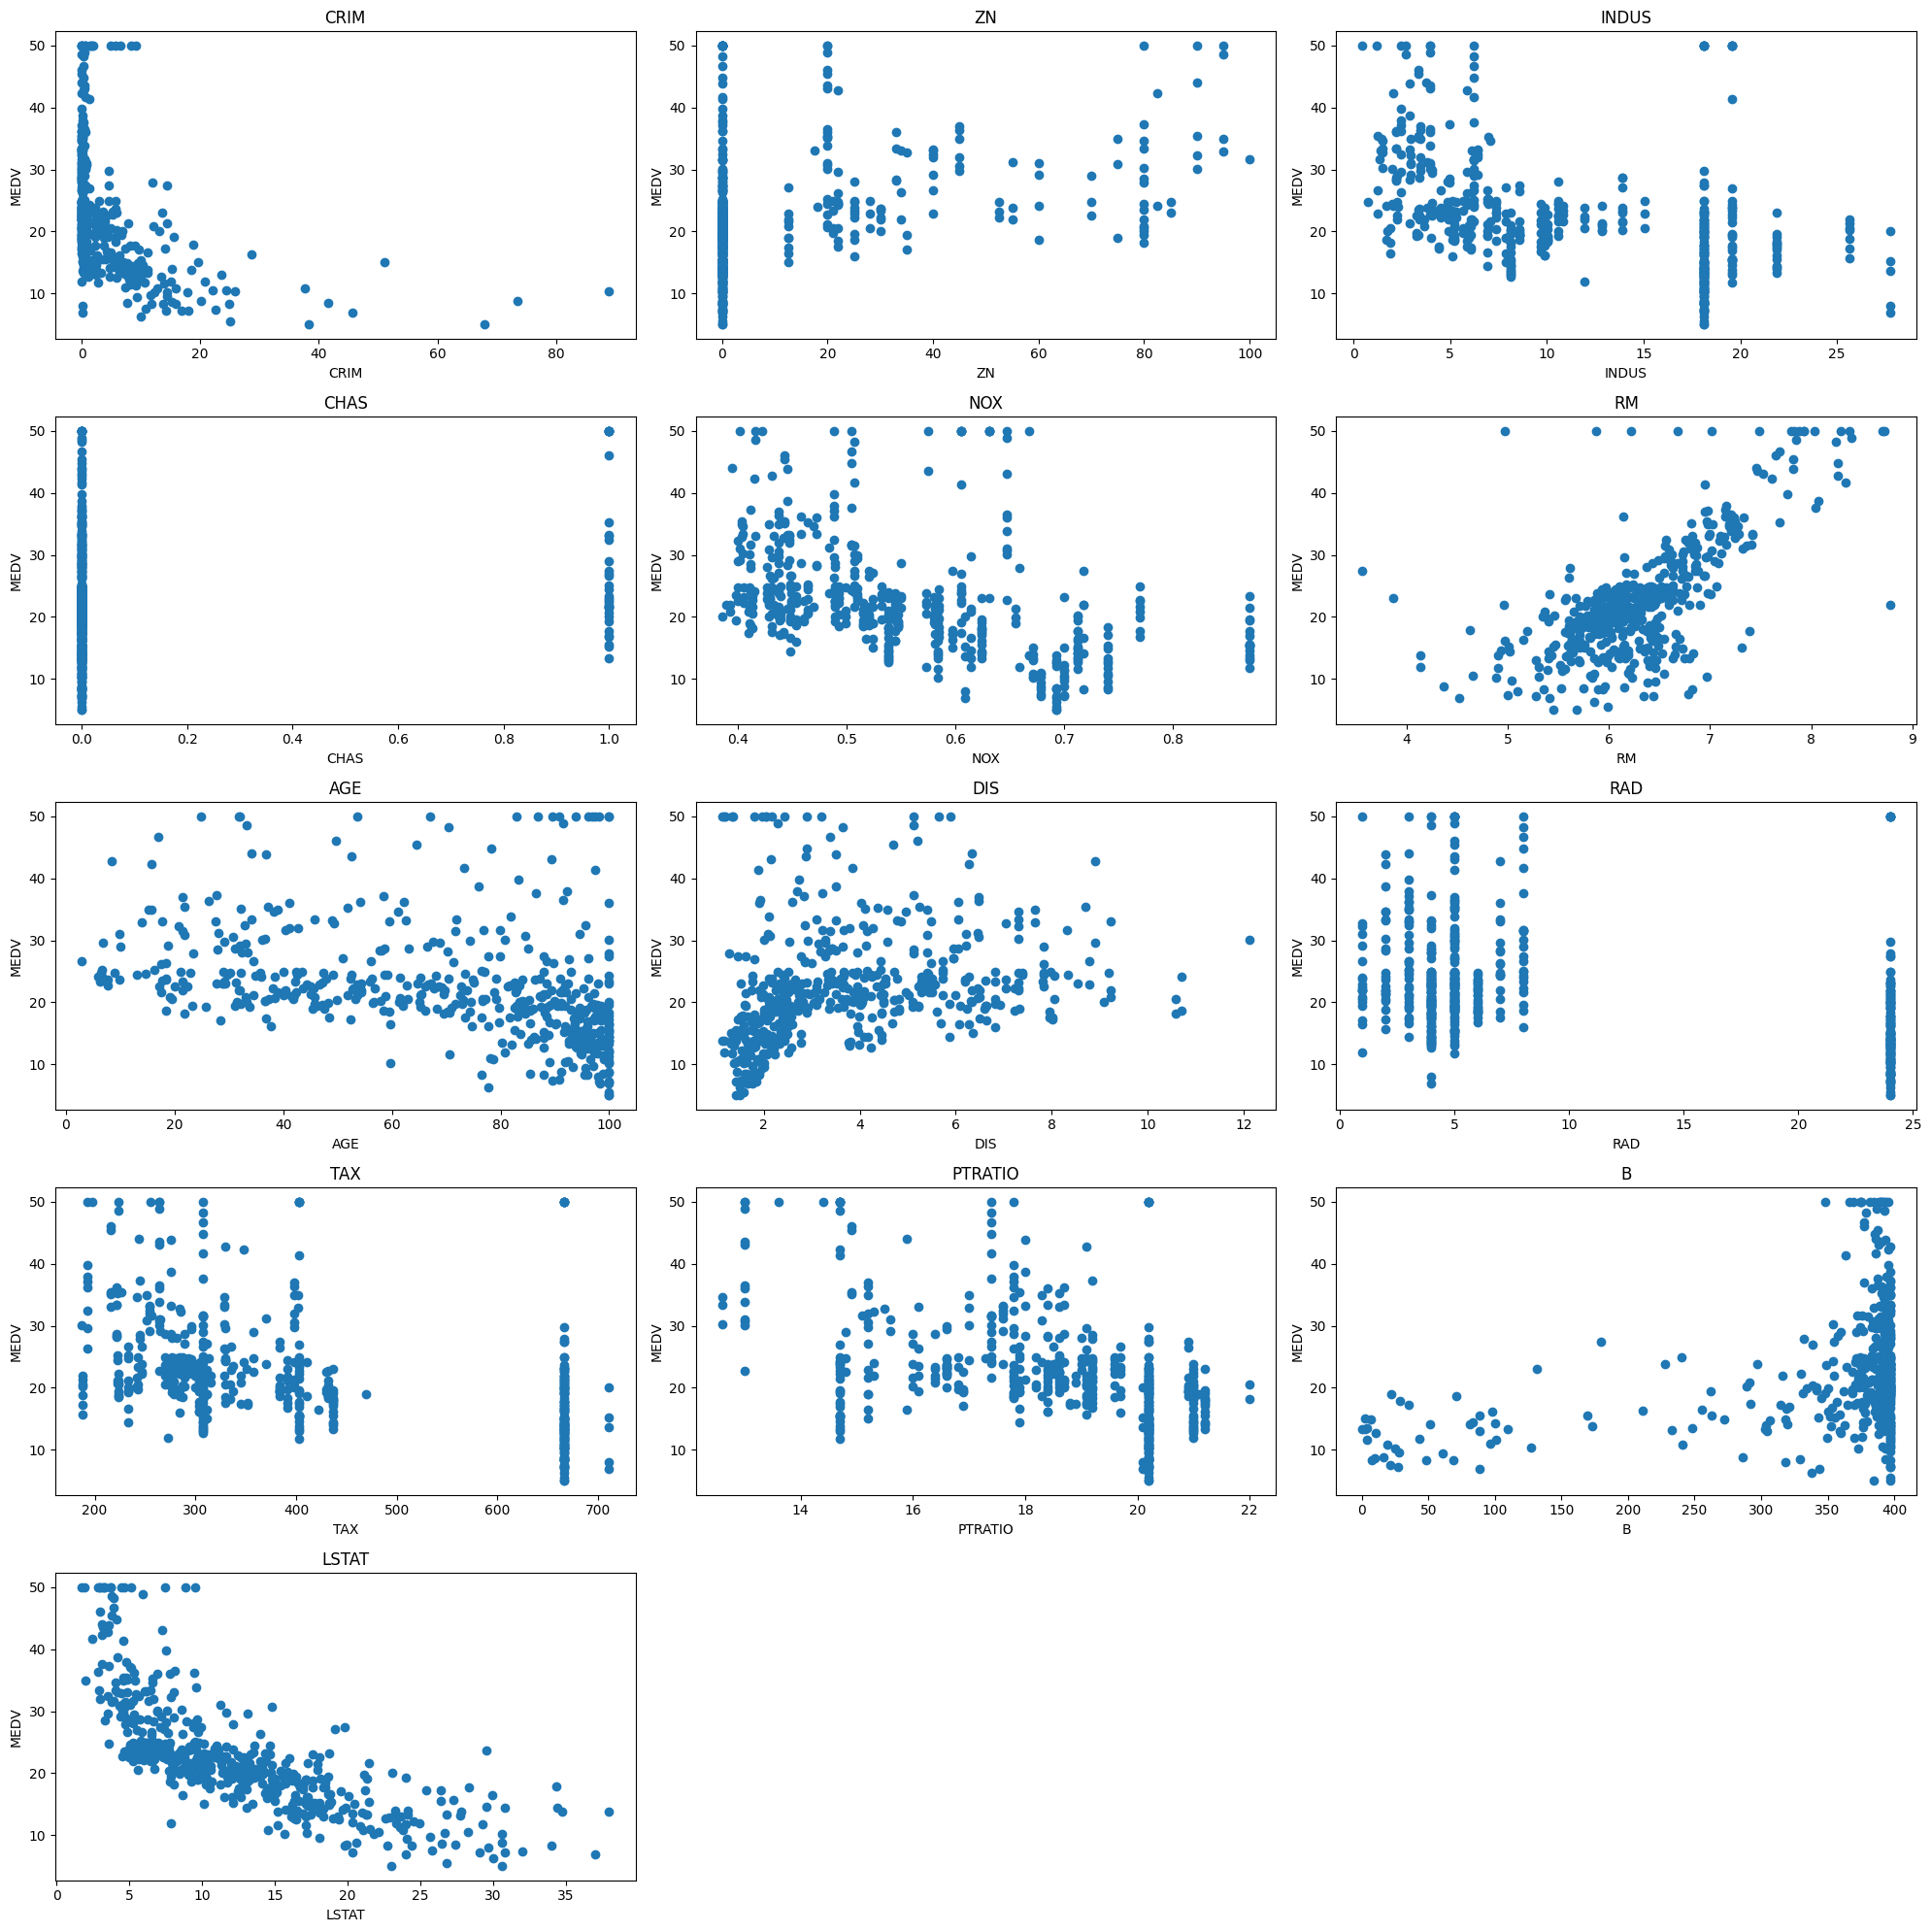

In [39]:
# Set figure size
plt.figure(figsize=(20,20))

# Loop through each column (except for MEDV)
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(5, 3, i+1)
    plt.scatter(df[column], df['MEDV'])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

# Visualization As Bar Chat

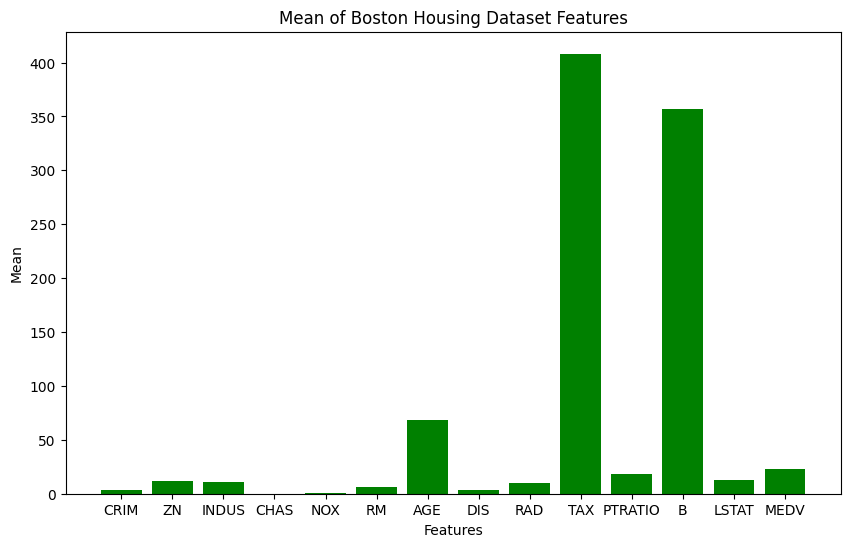

In [40]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(columns, df.mean(), color='green')
plt.title("Mean of Boston Housing Dataset Features")
plt.xlabel("Features")
plt.ylabel("Mean")
plt.show()

#heatmap that shows the correlation of each column with the 'MEDV' column.

<Axes: >

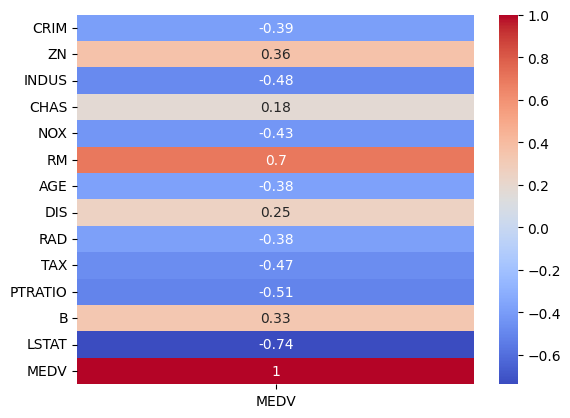

In [41]:
# Create a correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr[['MEDV']], cmap='coolwarm', annot=True)

# Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

# Split the dataset into features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Select top 5 features using f_regression as the scoring function
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support(indices=True)]
print(selected_features)


Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


# Batch Gradient Descent:

Epoch 1/1000 - Train Loss: 592.3280 - Test Loss: 507.2862
Epoch 2/1000 - Train Loss: 578.5060 - Test Loss: 493.8002
Epoch 3/1000 - Train Loss: 564.2327 - Test Loss: 479.9638
Epoch 4/1000 - Train Loss: 554.3365 - Test Loss: 471.1891
Epoch 5/1000 - Train Loss: 548.3224 - Test Loss: 465.8287
Epoch 6/1000 - Train Loss: 544.3321 - Test Loss: 462.5662
Epoch 7/1000 - Train Loss: 541.2442 - Test Loss: 460.2604
Epoch 8/1000 - Train Loss: 538.7750 - Test Loss: 458.6629
Epoch 9/1000 - Train Loss: 535.7630 - Test Loss: 457.2575
Epoch 10/1000 - Train Loss: 533.1776 - Test Loss: 456.0996
Epoch 11/1000 - Train Loss: 530.8094 - Test Loss: 454.6695
Epoch 12/1000 - Train Loss: 528.6593 - Test Loss: 453.3503
Epoch 13/1000 - Train Loss: 525.9220 - Test Loss: 451.7355
Epoch 14/1000 - Train Loss: 522.5208 - Test Loss: 450.1717
Epoch 15/1000 - Train Loss: 517.4906 - Test Loss: 448.4129
Epoch 16/1000 - Train Loss: 511.5031 - Test Loss: 446.7546
Epoch 17/1000 - Train Loss: 505.3863 - Test Loss: 444.9114
Epoch 

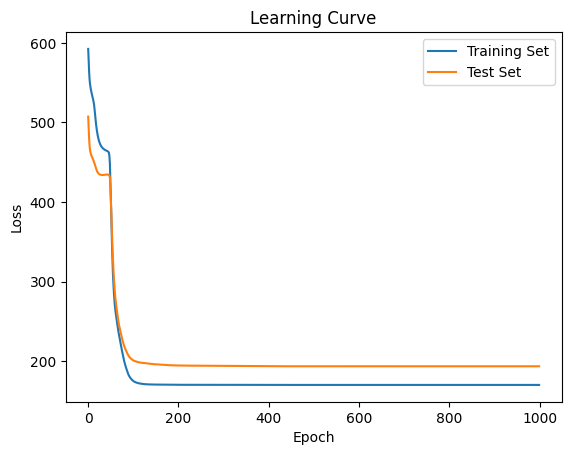

Accuracy on test set: -1.6003
F1 score on test set: 0.6952789699570816


In [43]:
# Select features
X = df[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']].values
y = df['MEDV'].values.reshape(-1, 1)

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define helper functions
def dotProduct(X, W):
    return np.dot(X, W)

def relu(Z):
    return np.maximum(0, Z)

def reluDerivative(Z):
    Z[Z<=0] = 0
    Z[Z>0] = 1
    return Z

def error(y, y_hat):
    return np.mean(np.square(y - y_hat))

def train(X_train, y_train, X_test, y_test, n_epochs, lr):
    n_samples_train, n_features = X_train.shape
    n_samples_test, _ = X_test.shape
    W = np.random.randn(n_features, 1)
    train_errors, test_errors = [], []
    for epoch in range(n_epochs):
        # Training set
        Z_train = dotProduct(X_train, W)
        y_hat_train = relu(Z_train)
        train_loss = error(y_train, y_hat_train)
        train_errors.append(train_loss)

        # Test set
        Z_test = dotProduct(X_test, W)
        y_hat_test = relu(Z_test)
        test_loss = error(y_test, y_hat_test)
        test_errors.append(test_loss)

        # Compute gradients and update weights
        dW = 2/n_samples_train * dotProduct(X_train.T, reluDerivative(Z_train) * (y_hat_train - y_train))
        W -= lr * dW

        # Print output for each epoch
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")

    return W, train_errors, test_errors

def predict(X, W):
    Z = dotProduct(X, W)
    return relu(Z)

# Train model
np.random.seed(30)
n_epochs = 1000
lr = 0.1
#train_size = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
W, train_errors, test_errors = train(X_train, y_train, X_test, y_test, n_epochs, lr)

# Plot learning curves
plt.plot(range(n_epochs), train_errors, label='Training Set')
plt.plot(range(n_epochs), test_errors, label='Test Set')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compute accuracy on test set

y_pred = predict(X_test, W)
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# Compute F1 score for test set

y_pred_test = predict(X_test, W)
f1 = f1_score(y_test > 0, y_pred_test > 0.5)
print("F1 score on test set:", f1)


# Mini-Batch Gradient Descent:

Epoch 0: Train error = 344.65104298035214, Test error = 559.0855131016879
Epoch 100: Train error = 190.31364944433517, Test error = 208.49585764593934
Epoch 200: Train error = 59.77149225302391, Test error = 194.6880741140048
Epoch 300: Train error = 118.34870968923984, Test error = 194.48619787743965
Epoch 400: Train error = 85.68962048353785, Test error = 194.47709579922525
Epoch 500: Train error = 43.73856688959099, Test error = 194.4777770659763
Epoch 600: Train error = 96.55564769677972, Test error = 194.47378796037503
Epoch 700: Train error = 326.52835139547454, Test error = 194.47496981699211
Epoch 800: Train error = 69.15509080886159, Test error = 194.47495811625376
Epoch 900: Train error = 183.70139744830726, Test error = 194.4732200643711


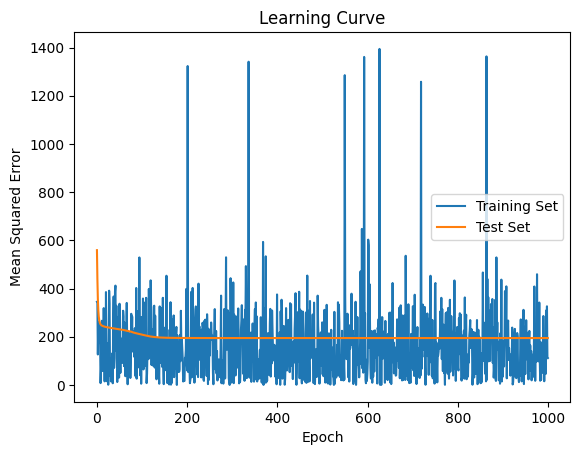

Accuracy on test set: 0.5813
F1 score on test set: 0.743801652892562


In [44]:
# Select features
X = df[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']].values
y = df['MEDV'].values.reshape(-1, 1)

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define helper functions
def dotProduct(X, W):
    return np.dot(X, W)

def relu(Z):
    return np.maximum(0, Z)

def reluDerivative(Z):
    Z[Z<=0] = 0
    Z[Z>0] = 1
    return Z

def error(y, y_hat):
    return np.mean(np.square(y - y_hat))

def train(X, y, n_epochs, lr, batch_size):
    n_samples, n_features = X.shape
    W = np.random.randn(n_features, 1)
    errors_train = []
    errors_test = []
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(n_samples)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            Z = dotProduct(X_batch, W)
            y_hat = relu(Z)
            loss = error(y_batch, y_hat)
            dW = 2/batch_size * dotProduct(X_batch.T, reluDerivative(Z) * (y_hat - y_batch))
            W -= lr * dW
        errors_train.append(loss)
        y_pred = predict(X_test, W)
        errors_test.append(error(y_test, y_pred))
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train error = {loss}, Test error = {errors_test[-1]}")
    return W, errors_train, errors_test

def predict(X, W):
    Z = dotProduct(X, W)
    return relu(Z)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Train model
np.random.seed(50)
n_epochs = 1000
lr = 0.01
batch_size = 32
W, errors_train, errors_test = train(X_train, y_train, n_epochs, lr, batch_size)

# Plot learning curve
plt.plot(range(n_epochs), errors_train, label='Training Set')
plt.plot(range(n_epochs), errors_test, label='Test Set')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Compute accuracy on test set
y_pred = predict(X_test, W)
accuracy = np.mean(np.abs(y_test - y_pred) / y_test)
print("Accuracy on test set:", round(accuracy, 4))

# Compute F1 score for test set
y_pred_test = predict(X_test, W)
f1 = f1_score(y_test > 0, y_pred_test > 0.5)
print("F1 score on test set:", f1)


# Stochastic gradient descent.

Epoch 1/1000 - Train Loss: 635.2047 - Test Loss: 525.7167
Epoch 2/1000 - Train Loss: 683.8091 - Test Loss: 705.0058
Epoch 3/1000 - Train Loss: 230.1998 - Test Loss: 228.2743
Epoch 4/1000 - Train Loss: 235.9320 - Test Loss: 250.1026
Epoch 5/1000 - Train Loss: 196.5055 - Test Loss: 178.4085
Epoch 6/1000 - Train Loss: 223.8366 - Test Loss: 174.3397
Epoch 7/1000 - Train Loss: 374.5056 - Test Loss: 342.2021
Epoch 8/1000 - Train Loss: 200.8341 - Test Loss: 190.4806
Epoch 9/1000 - Train Loss: 272.2753 - Test Loss: 262.2844
Epoch 10/1000 - Train Loss: 240.5648 - Test Loss: 237.5729
Epoch 11/1000 - Train Loss: 251.6811 - Test Loss: 255.2540
Epoch 12/1000 - Train Loss: 181.3745 - Test Loss: 200.2679
Epoch 13/1000 - Train Loss: 210.8053 - Test Loss: 227.6538
Epoch 14/1000 - Train Loss: 195.6109 - Test Loss: 190.6703
Epoch 15/1000 - Train Loss: 332.4626 - Test Loss: 242.8500
Epoch 16/1000 - Train Loss: 549.1203 - Test Loss: 563.2046
Epoch 17/1000 - Train Loss: 223.2265 - Test Loss: 204.4068
Epoch 

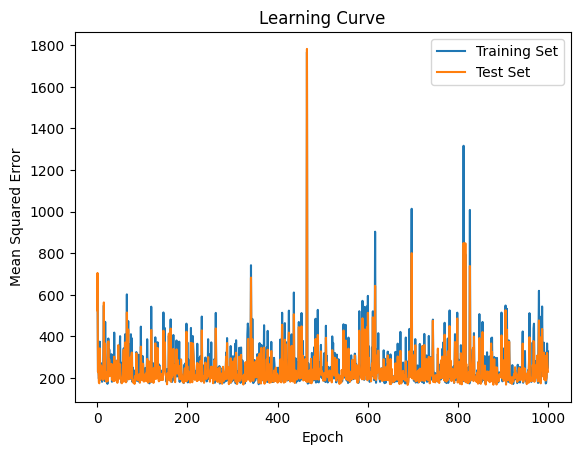

Accuracy on test set: -2.0841
F1 score on test set: 0.6607929515418501


In [45]:
# Select features
X = df[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']].values
y = df['MEDV'].values.reshape(-1, 1)

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define helper functions
def dotProduct(X, W):
    return np.dot(X, W)

def relu(Z):
    return np.maximum(0, Z)

def reluDerivative(Z):
    Z[Z<=0] = 0
    Z[Z>0] = 1
    return Z

def error(y, y_hat):
    return np.mean(np.square(y - y_hat))

def sgd(X, y, W, lr):
    n_samples, _ = X.shape
    random_indices = np.random.permutation(n_samples)
    for i in random_indices:
        x_i = X[i, :].reshape(1, -1)
        y_i = y[i]
        z_i = dotProduct(x_i, W)
        y_hat_i = relu(z_i)
        dW = 2 * x_i.T * reluDerivative(z_i) * (y_hat_i - y_i)
        W -= lr * dW

def train(X_train, y_train, X_test, y_test, n_epochs, lr):
    n_samples_train, n_features = X_train.shape
    n_samples_test, _ = X_test.shape
    W = np.random.randn(n_features, 1)
    train_errors, test_errors = [], []
    for epoch in range(n_epochs):
        # Training set
        sgd(X_train, y_train, W, lr)
        Z_train = dotProduct(X_train, W)
        y_hat_train = relu(Z_train)
        train_loss = error(y_train, y_hat_train)
        train_errors.append(train_loss)

        # Test set
        Z_test = dotProduct(X_test, W)
        y_hat_test = relu(Z_test)
        test_loss = error(y_test, y_hat_test)
        test_errors.append(test_loss)

        # Print output for each epoch
        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")

    return W, train_errors, test_errors

def predict(X, W):
    Z = dotProduct(X, W)
    return relu(Z)

# Train model
np.random.seed(50)
n_epochs = 1000
lr = 0.1
train_size = 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
W, train_errors, test_errors = train(X_train, y_train, X_test, y_test, n_epochs, lr)

# Plot learning curves
plt.plot(range(n_epochs), train_errors, label='Training Set')
plt.plot(range(n_epochs), test_errors, label='Test Set')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Compute accuracy on test set
from sklearn.metrics import r2_score
y_pred = predict(X_test, W)
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

from sklearn.metrics import f1_score

# Compute F1 score for test set
y_pred_test = predict(X_test, W)
f1 = f1_score(y_test > 0, y_pred_test > 0.5)
print("F1 score on test set:", f1)
